# Kernel PCA

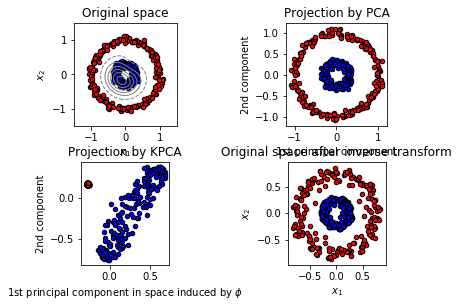

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(10)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()

## Classification using SVM

In [46]:
from sklearn.model_selection import train_test_split
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify = y)

In [47]:
from sklearn.svm import SVC
from time import time
# #############################################################################
# Train a SVM classification model
print("Fitting the classifier to the training set")
t0 = time()
clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))

Fitting the classifier to the training set
done in 0.002s


In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# #############################################################################
# Quantitative evaluation of the model quality on the test set
print("Predicting class on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Predicting class on the test set
done in 0.001s
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100

[[50  0]
 [ 0 50]]


Text(0.5,1,'Classification after SVM')

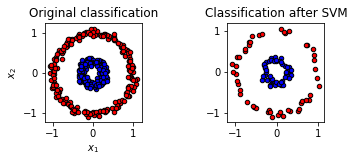

In [49]:
plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original classification")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


reds_p = y_pred == 0
blues_p = y_pred == 1

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_test[reds_p, 0], X_test[reds_p, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_test[blues_p, 0], X_test[blues_p, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Classification after SVM")
# plt.xlabel("1st principal component in space induced by $\phi$")
# plt.ylabel("2nd component")

## Clasification using RVM

In [38]:
from sklearn.model_selection import train_test_split
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify = y)#, random_state=39)

In [43]:
#use -1 and 1

150

In [44]:
from skrvm import RVR
# from skrvm import RVC
# #############################################################################
# Train a RVM classification model
print("Fitting the classifier to the training set")
t0 = time()
clf = RVR(kernel='rbf')
clf.fit(X_train, y_train)
RVR(alpha=1e-06, beta=1e-06, beta_fixed=False, bias_used=True, coef0=0.0,
coef1=None, degree=3, kernel='rbf', n_iter=3000,
threshold_alpha=1000000000.0, tol=0.001, verbose=False)
print("done in %0.3fs" % (time() - t0))
# clf.score(X_train, y_train)

Fitting the classifier to the training set
done in 0.199s


In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# #############################################################################
# Quantitative evaluation of the model quality on the test set
print("Predicting class on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

count = 0
for values in y_pred:
    if y_pred[count] >=1:
        y_pred[count] = 1
        count = count+1
    else:
        y_pred[count] = 0
        count = count+1
        
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Predicting class on the test set
done in 0.002s
             precision    recall  f1-score   support

          0       0.68      1.00      0.81        50
          1       1.00      0.52      0.68        50

avg / total       0.84      0.76      0.75       100

[[50  0]
 [24 26]]


Text(0.5,1,'Classification after RVM')

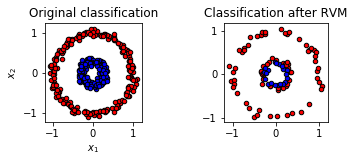

In [22]:
plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original classification")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


reds_p = y_pred == 0
blues_p = y_pred == 1

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_test[reds_p, 0], X_test[reds_p, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_test[blues_p, 0], X_test[blues_p, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Classification after RVM")
# plt.xlabel("1st principal component in space induced by $\phi$")
# plt.ylabel("2nd component")

## Classification using Gaussian Process

In [56]:
from sklearn.model_selection import train_test_split
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify = y)

In [57]:
from sklearn.gaussian_process import GaussianProcessRegressor
# #############################################################################
# Train a GPR classification model
print("Fitting the classifier to the training set")
t0 = time()
clf = GaussianProcessRegressor() # Uses RBF as default
clf.fit(X_train, y_train)

print("done in %0.3fs" % (time() - t0))
# clf.score(X_train, y_train)

Fitting the classifier to the training set
done in 0.011s


In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# #############################################################################
# Quantitative evaluation of the model quality on the test set
print("Predicting class on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

count = 0
for values in y_pred:
    if y_pred[count] >=1:
        y_pred[count] = 1
        count = count+1
    else:
        y_pred[count] = 0
        count = count+1
        
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Predicting class on the test set
done in 0.002s
             precision    recall  f1-score   support

          0       0.76      1.00      0.86        50
          1       1.00      0.68      0.81        50

avg / total       0.88      0.84      0.84       100

[[50  0]
 [16 34]]


Text(0.5,1,'Classification after GPR')

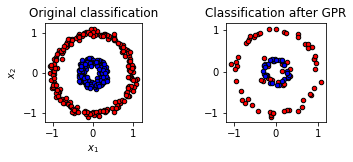

In [59]:
plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original classification")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


reds_p = y_pred == 0
blues_p = y_pred == 1

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_test[reds_p, 0], X_test[reds_p, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_test[blues_p, 0], X_test[blues_p, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Classification after GPR")
# plt.xlabel("1st principal component in space induced by $\phi$")
# plt.ylabel("2nd component")